In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

In [3]:
df.head(3)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.3549,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [5]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [6]:
df = df.drop("Unnamed: 0",axis =1)

In [7]:
df.tail(2)

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943
3997,324966,400000,2013-02-01,present,senior systems engineer,Chennai,f,1991-02-26,70.60,cbse,...,-1,-1,-1,-1,-1,-1.1128,-0.2793,-0.6343,1.32553,-0.6035


In [177]:
new_df = df[["Salary","DOJ","DOL","Designation","JobCity","conscientiousness",
             "agreeableness","extraversion","nueroticism","openess_to_experience","Gender","Specialization","GraduationYear"]]

In [191]:
new_df.head()

,Salary,DOJ,DOL,Designation,JobCity,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Gender,Specialization,GraduationYear
0,420000,2012-06-01,present,senior quality engineer,Bangalore,0.9737,0.8128,0.5269,1.35490,-0.4455,f,computer engineering,2011
1,500000,2013-09-01,present,assistant manager,Indore,-0.7335,0.3789,1.2396,-0.10760,0.8637,m,electronics and communication engineering,2012
2,325000,2014-06-01,present,systems engineer,Chennai,0.2718,1.7109,0.1637,-0.86820,0.6721,f,information technology,2014
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,0.0464,0.3448,-0.3440,-0.40780,-0.9194,m,computer engineering,2011
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,m,electronics and communication engineering,2012


In [192]:
# Calculate the IQR of the salary column
Q1 = new_df["Salary"].quantile(0.25)
Q3 = new_df["Salary"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

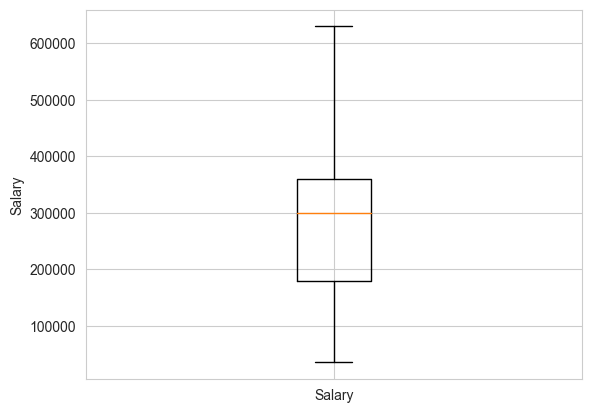

In [193]:
# Create a new DataFrame without outliers
df_no_outliers = new_df[(new_df["Salary"] >= lower_bound) & (new_df["Salary"] <= upper_bound)]

# Plot the box plot without outliers
fig, ax = plt.subplots()
ax.boxplot(df_no_outliers["Salary"], showfliers=False)
ax.set_xticklabels(["Salary"])
ax.set_ylabel("Salary")
plt.show()

In [194]:
Q1 = new_df["conscientiousness"].quantile(0.25)
Q3 = new_df["conscientiousness"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

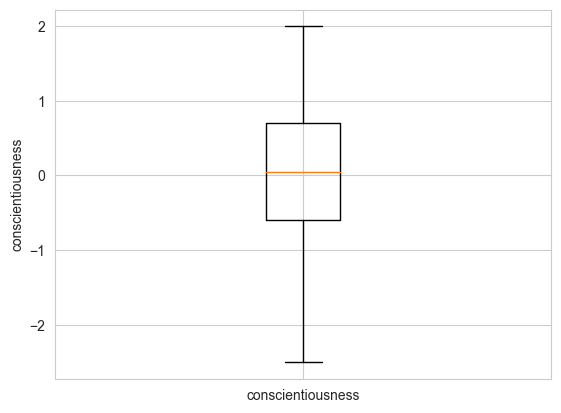

In [195]:
# Create a new DataFrame without outliers
df_no_outliers = new_df[(new_df["conscientiousness"] >= lower_bound) & (new_df["conscientiousness"] <= upper_bound)]

# Plot the box plot without outliers
fig, ax = plt.subplots()
ax.boxplot(df_no_outliers["conscientiousness"], showfliers=False)
ax.set_xticklabels(["conscientiousness"])
ax.set_ylabel("conscientiousness")
plt.show()

In [196]:
Q1 = new_df["agreeableness"].quantile(0.25)
Q3 = new_df["agreeableness"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

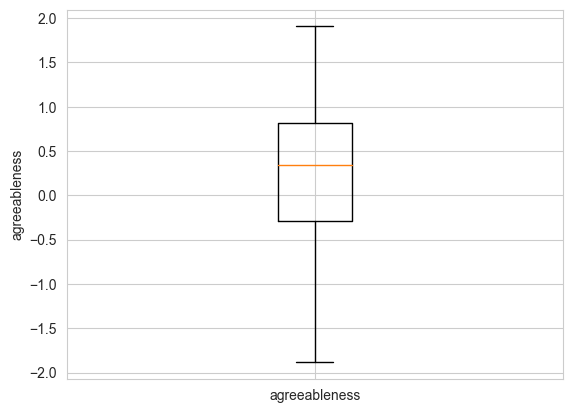

In [197]:
# Create a new DataFrame without outliers
df_no_outliers = new_df[(new_df["agreeableness"] >= lower_bound) & (new_df["agreeableness"] <= upper_bound)]

# Plot the box plot without outliers
fig, ax = plt.subplots()
ax.boxplot(df_no_outliers["agreeableness"], showfliers=False)
ax.set_xticklabels(["agreeableness"])
ax.set_ylabel("agreeableness")
plt.show()

In [198]:
Q1 = new_df["extraversion"].quantile(0.25)
Q3 = new_df["extraversion"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

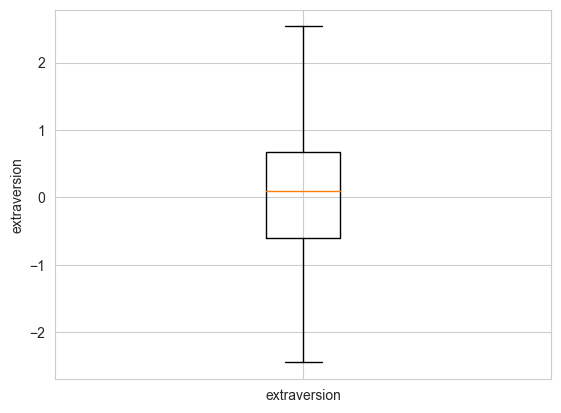

In [199]:
# Create a new DataFrame without outliers
df_no_outliers = new_df[(new_df["extraversion"] >= lower_bound) & (new_df["extraversion"] <= upper_bound)]

# Plot the box plot without outliers
fig, ax = plt.subplots()
ax.boxplot(df_no_outliers["extraversion"], showfliers=False)
ax.set_xticklabels(["extraversion"])
ax.set_ylabel("extraversion")
plt.show()

In [200]:
Q1 = new_df["nueroticism"].quantile(0.25)
Q3 = new_df["nueroticism"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

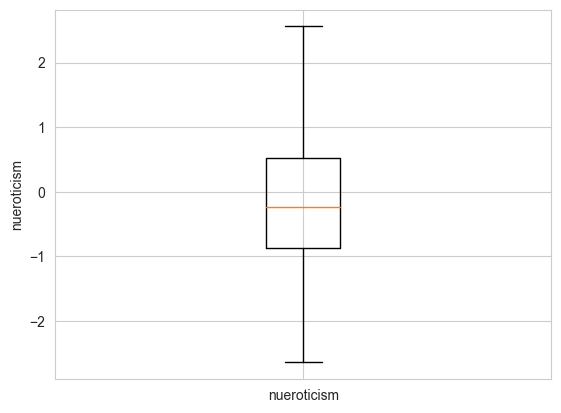

In [201]:
# Create a new DataFrame without outliers
df_no_outliers = new_df[(new_df["nueroticism"] >= lower_bound) & (new_df["nueroticism"] <= upper_bound)]

# Plot the box plot without outliers
fig, ax = plt.subplots()
ax.boxplot(df_no_outliers["nueroticism"], showfliers=False)
ax.set_xticklabels(["nueroticism"])
ax.set_ylabel("nueroticism")
plt.show()

In [202]:
new_df = new_df[new_df["JobCity"] != -1]

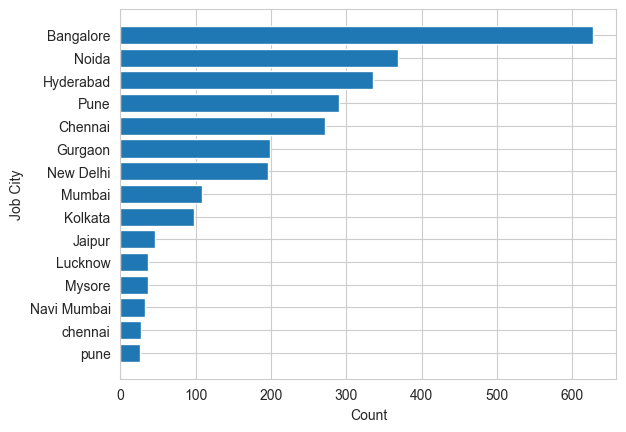

In [203]:
# Get the top 15 job cities by value counts
top_15_job_cities = new_df['JobCity'].value_counts().nlargest(15)

# Plot the top 15 job cities using a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_15_job_cities.index, top_15_job_cities.values)
ax.set_xlabel("Count")
ax.set_ylabel("Job City")
ax.invert_yaxis()
plt.show()

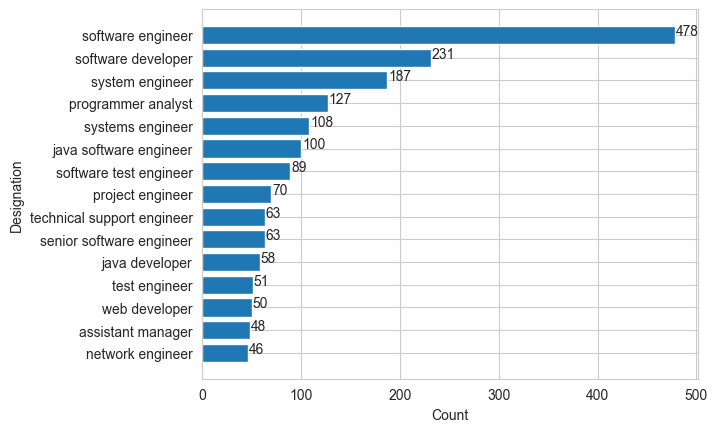

In [204]:
# Get the top 15 job Designation by value counts
top_15_job_Designation = new_df['Designation'].value_counts().nlargest(15)

# Plot the top 15 job Designation using a horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top_15_job_Designation.index, top_15_job_Designation.values)
ax.set_xlabel("Count")
ax.set_ylabel("Designation")
ax.invert_yaxis()
for i, v in enumerate(top_15_job_Designation.values):
    ax.text(v + 1, i, str(v))
plt.show()

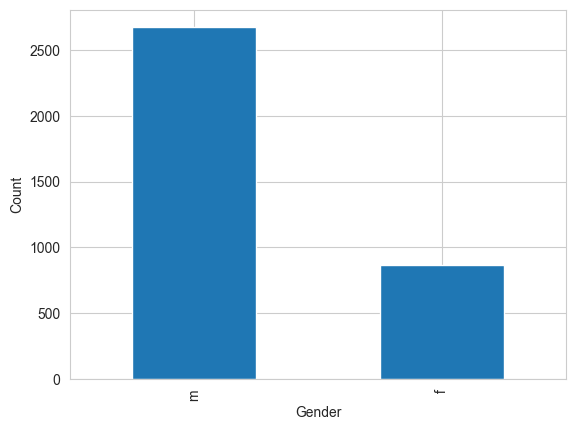

In [205]:
## Getting the counts of Gender
new_df['Gender'].value_counts().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### Working on Bivariate Analysis:
Question 1: How many females are software Engineer?

Question 2: How many males software Engineer earning above the average salary of Software Engineer?

Question 3: How many males and Females are presently working?

Question 4: Calculate the maximum number of Experience the software Engineer has?

Question 5: Calculate the maximum number of Experience the male and Female have?

In [206]:
## How many Females are software Engineer?

print("The number of females who are software engineer:",
      len(new_df.loc[(new_df['Designation'] == 'software engineer') & 
                     (new_df['Gender'] == 'f')]))

The number of females who are software engineer: 118


In [207]:
## How many males software Engineer earning above the average salary of Software Engineer?

print("The number of males who are software engineer and earning above the average salary of software engineer are:"
    ,len(new_df[(new_df['Designation'] =='software engineer') & (new_df['Salary'] > new_df['Salary'].mean()) &
           (new_df['Gender'] == 'm')]))

The number of males who are software engineer and earning above the average salary of software engineer are: 209


In [208]:
## How many males and Females are presently working?

print("The number of males are presently working are:",
      len(new_df[(new_df['DOL'] == 'present') & (new_df['Gender'] == 'm')]))

print("The number of Females are presently working are:",
      len(new_df[(new_df['DOL'] == 'present') & (new_df['Gender'] == 'f')]))

The number of males are presently working are: 1263
The number of Females are presently working are: 414


In [209]:
## Calculate the maximum number of Experience the software Engineer has?

left = new_df[new_df['DOL'] != 'present']

In [210]:
left["DOJ"]= pd.to_datetime(left["DOJ"])
left["DOL"]= pd.to_datetime(left["DOL"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_436\2837210068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left["DOJ"]= pd.to_datetime(left["DOJ"])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_436\2837210068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left["DOL"]= pd.to_datetime(left["DOL"])


In [211]:
left["Experience"] = left['DOL'] - left['DOJ']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_436\843241091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left["Experience"] = left['DOL'] - left['DOJ']


In [212]:
print("The max number of Experience the software engineer has:",left["Experience"].max())

The max number of Experience the software engineer has: 2192 days 00:00:00


In [213]:
## Calculate the maximum number of Experience the male and Female have?

print("The maximum number of experience the female has:", left[left['Gender'] == 'f']['Experience'].max())
print("The maximum number of experience the male has:", left[left['Gender'] == 'm']['Experience'].max())

The maximum number of experience the female has: 1551 days 00:00:00
The maximum number of experience the male has: 2192 days 00:00:00


## <b>Step - 5 - Research Questions</b>
- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.
- Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)

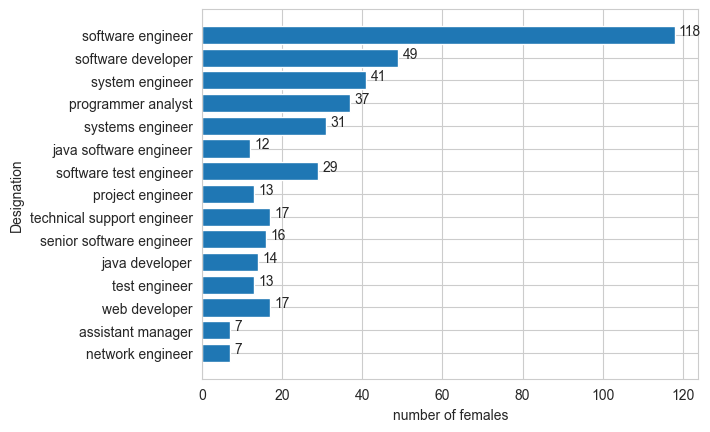

In [214]:
## Females Vs Designation

top_15_job_Designation = new_df['Designation'].value_counts().head(15)
female_counts = new_df[new_df['Gender'] == 'f'].groupby('Designation').size()[top_15_job_Designation.index]

fig, ax = plt.subplots()
ax.barh(top_15_job_Designation.index, female_counts.values)
ax.set_xlabel("number of females")
ax.set_ylabel("Designation")
ax.invert_yaxis()

for i, v in enumerate(female_counts.values):
    ax.text(v + 1, i, str(v))
plt.show()

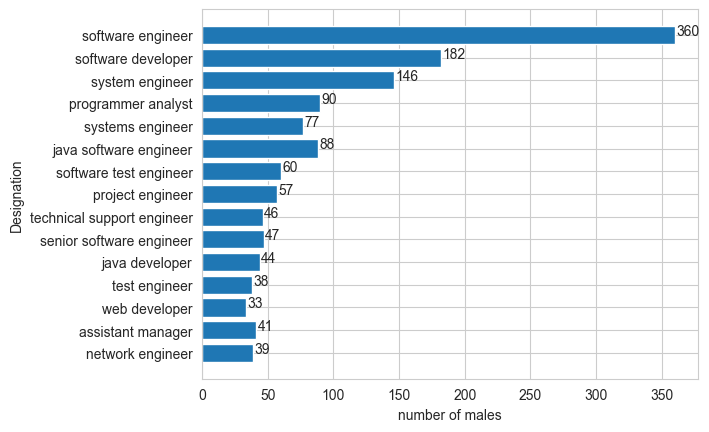

In [215]:
## Males Vs Designation

top_15_job_Designation = new_df['Designation'].value_counts().head(15)
male_counts = new_df[new_df['Gender'] == 'm'].groupby('Designation').size()[top_15_job_Designation.index]

fig, ax = plt.subplots()
ax.barh(top_15_job_Designation.index, male_counts.values)
ax.set_xlabel("number of males")
ax.set_ylabel("Designation")
ax.invert_yaxis()

for i, v in enumerate(male_counts.values):
    ax.text(v + 1, i, str(v))
plt.show()

In [216]:
left['Experience'] = left['Experience'].astype(str).str.replace("days","")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_436\2442971714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left['Experience'] = left['Experience'].astype(str).str.replace("days","")


In [217]:
left['Experience'] = pd.to_numeric(left['Experience'], errors='coerce').astype('Int64')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_436\876237770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left['Experience'] = pd.to_numeric(left['Experience'], errors='coerce').astype('Int64')


In [218]:
left['Experience']=left['Experience']/365.25

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_436\1245819412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left['Experience']=left['Experience']/365.25


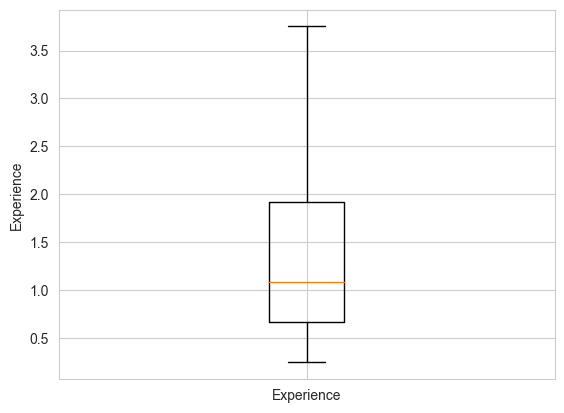

In [219]:
## Univariate on Experience column

Q1 = left["Experience"].quantile(0.25)
Q3 = left["agreeableness"].quantile(0.75)
IQR = Q3 - Q1

# Calculate the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR



df_no_outliers = left[(left["Experience"] >= lower_bound) & (left["nueroticism"] <= upper_bound)]

# Plot the box plot without outliers
fig, ax = plt.subplots()
ax.boxplot(df_no_outliers["Experience"], showfliers=False)
ax.set_xticklabels(["Experience"])
ax.set_ylabel("Experience")
plt.show()

In [237]:
left.head()

,Salary,DOJ,DOL,Designation,JobCity,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Gender,Specialization,GraduationYear,Experience
4,200000,2014-03-01,2015-03-01,get,Manesar,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,m,electronics and communication engineering,2012,0.999316
6,300000,2014-08-01,2015-05-01,java software engineer,Banglore,1.7081,-0.1054,-1.0379,-2.00920,-1.0872,m,computer science & engineering,2014,0.747433
7,400000,2014-07-01,2015-07-01,mechanical engineer,Bangalore,-0.0154,1.2114,0.0100,0.14590,1.2470,m,mechanical engineering,2016,0.999316
10,600000,2011-04-01,2015-04-01,senior php developer,Bangalore,0.0464,0.8128,0.0914,0.17980,0.0284,m,computer engineering,2010,4.0
11,450000,2011-08-01,2014-10-01,senior systems engineer,Pune,-2.2720,1.1248,0.8171,-0.40780,-0.4455,m,information technology,2011,3.167693


In [238]:
left['DOJ'].dt.year

4       2014
6       2014
7       2014
10      2011
11      2011
        ... 
3991    2011
3992    2014
3993    2011
3994    2013
3996    2014
Name: DOJ, Length: 1860, dtype: int64

In [242]:
left["Experience_after_passingout"] = left['DOJ'].dt.year - left['GraduationYear']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_436\1438790474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left["Experience_after_passingout"] = left['DOJ'].dt.year - left['GraduationYear']


In [245]:
## This let us know the fresh graduate shape.

left = left[left["Experience_after_passingout"] == 0]

In [246]:
left = left[left['Designation'].isin([
    'software engineer', 'programmer analyst', 'hardware engineer', 'associate engineer'])]


In [248]:
left.shape

(150, 15)

In [252]:
left = left[left['Specialization'] == 'computer engineering']

In [253]:
left.shape

(39, 15)

In [255]:
print("The mean salary of Fresh Graduates as per the specialization mentioned:",left['Salary'].mean())

The mean salary of Fresh Graduates as per the specialization mentioned: 408974.358974359


## Conclusion

Question 1: How many females are software Engineer?

<b>Solution 1: The number of females who are software engineer: 118</b>   
    
Question 2: How many males software Engineer earning above the average salary of Software Engineer?

<b>Solution 2: The number of males who are software engineer and earning above the average salary of software engineer are: 209</b> 

Question 3: How many males and Females are presently working?

<b>Solution 3: The number of males are presently working are: 1263
    The number of Females are presently working are: 414</b>

Question 4: Calculate the maximum number of Experience the software Engineer has?

<b>Solution 4: The max number of Experience the software engineer has: 2192 days</b>

Question 5: Calculate the maximum number of Experience the male and Female have?

<b>Solution 5: The maximum number of experience the female has: 1551 days
    The maximum number of experience the male has: 2192 days</b> 
    
    
<b>The claim of earning upto 2.5-3 lacs as a fresh graduate is incorrect as the average salary is 408974</b>

<b>Yes the specialization depend on the gender as per the graphs given.</b>